# The effect of irrigating the desert (south of Alexandria)

IHE, Delft, transient groundwater

@T.N.Olsthoorn, 2019-01-04

## Context

Effect of a rising lake on adjacent groundwater heads

South-west of Alexandria part of the Sahara desert has been reclaimed by irrigating with river Nile water since the 1970s. This area is about 30x30 km and the recharge is about 1.5 m/year, half of which is evaporated by the crops and half is recharged, i.e. largely lost for crop production (it may become too saline in the subsurface).

The Sahara aquifer is about 200 m thick and unconfined. The initial water table was at 30 below ground surface.

We can simulate this situation by means of Theis wells placed in a regular grid to simulate the area-wide irrigation and then superimpose the result to see what happens at arbitrary locations over time.

Of course, we may also make influence maps by computing the results for a grid of points and then contouring the results. This would just more computation time, but is not necesarily more complicated.

Let the center of the irrigated area coincide with our coordinate system.

## Loading modules

In [21]:
import numpy as np
from scipy.special import exp1 # Theis well function
import matplotlib.pyplot as plt

## Convenience funtion for setting up a graph

In [22]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

## Implementation

In [32]:
# aquifer properties
kD = 200 * 25 * (365) # m2/y
S = 0.25 # [-], storage coefficient

In [33]:
# place wells
a = 1000. # m cell size
L = 30e3 # km
xw = np.linspace(-(L - a)/2, (L - a)/2, L/a) # m, coordinatres of the cell centers = well
yw = np.linspace(-(L - a)/2, (L - a)/2, L/a) # m, coordinaters of the cell centers = well
Xw, Yw = np.meshgrid(xw, yw)

In [34]:
# Irrigation in m/y
q = 0.25 # m/y
Q = a**2 * q  # irrigation per well in m3/y

In [35]:
# observation points
Y0 = np.array([0, 10, 20, 40, 60]) * 1e3
X0 = np.zeros_like(Y0)

ValueError: non-broadcastable output operand with shape () doesn't match the broadcast shape (30,30)

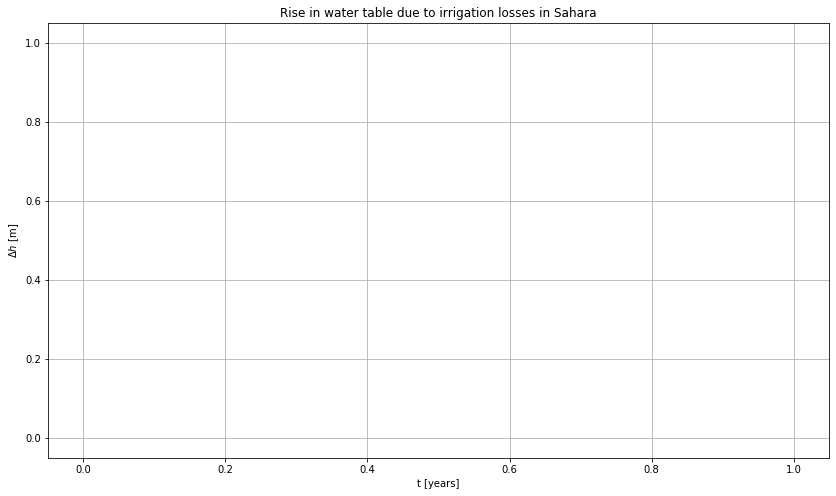

In [36]:
# effect on observation point

ax = newfig('Rise in water table due to irrigation losses in Sahara', 't [years]', '$\Delta h$ [m]')

times = np.logspace(0, 2, 41) # time in years
for t in times:
    s = np.zeros_like(t)
    for x0, y0 in zip(X0, Y0):
        R = np.sqrt((x0 - Xw)**2 + (y0 - Yw)**2)
        s += Q/(4 * np.pi * kD) * exp1(R**2 * S/ (4 * kD * t))
        ax.plot(t, s, label='x0,y0 = ({:.0f}, {:.0f}) km'.format(x0/1000, y0/1000))
ax.legend()


## Contour the head built up over 50 years irrigation

In [28]:
# Grid coordinates
x0 = np.linspace(-50e3, 50e3, 10) # Grid line coordinates
y0 = np.linspace(-50e3, 50e3, 10) # Grid line coordinates
X0, Y0 = np.meshgrid(x0, y0) # Full grid of coordinates allow contouring

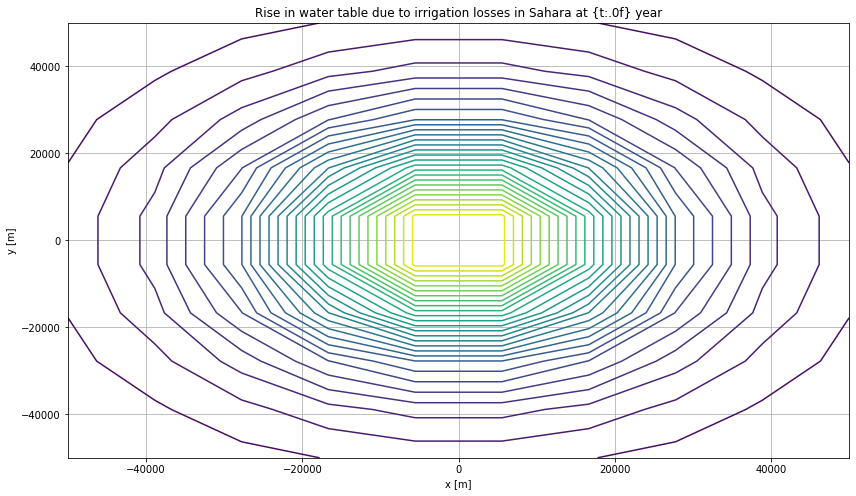

In [29]:
# Contouring the situation at t = 50 years

ax = newfig('Rise in water table due to irrigation losses in Sahara at {t:.0f} year', 'x [m]', 'y [m]')

t = 50 # years

s = np.zeros_like(X0)

for xwi in Xw.ravel():
    for ywi in Yw.ravel():
        R = np.sqrt((X0 - xwi)**2 + (Y0 - ywi)**2)
        s += Q/(4 * np.pi * kD) * exp1(R**2 * S/ (4 * kD * t))
ax.contour(X0, Y0, s, levels=30)


In [30]:
print(np.max(s), np.min(s))

4093.6017781946935 25.07739028060292


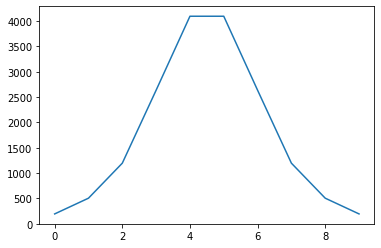

In [31]:
plt.plot(s[5])